<a href="https://colab.research.google.com/github/priti378/Speech_emotion_recognition/blob/main/Speech_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# System and OS interaction
import os
import zipfile
import warnings

# Audio processing
import librosa
import librosa.display

# Display utilities
import IPython.display as ipd

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')


In [16]:
# upload speech ZIP file
zip_path = "Audio_Speech_Actors_01-24.zip"
audio_root = "Audio_Speech_Actors_01-24"

# Extract
if not os.path.exists(audio_root):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(audio_root)
    print(f"Extracted to {audio_root}")
else:
    print(f"Already extracted at {audio_root}")


Already extracted at Audio_Speech_Actors_01-24


In [18]:
# upload song ZIP file
zip_path1 = "Audio_Song_Actors_01-24.zip"
music_root = "Audio_Song_Actors_01-24"

# Extract
if not os.path.exists(music_root):
    with zipfile.ZipFile(zip_path1, 'r') as zip_ref:
        zip_ref.extractall(music_root)
    print(f"Extracted to {music_root}")
else:
    print(f"Already extracted at {music_root}")

Already extracted at Audio_Song_Actors_01-24


In [8]:
speech_list = os.listdir("Audio_Speech_Actors_01-24")
speech_list

['Actor_03',
 'Actor_18',
 'Actor_20',
 'Actor_16',
 'Actor_08',
 'Actor_19',
 'Actor_24',
 'Actor_04',
 'Actor_05',
 'Actor_02',
 'Actor_06',
 'Actor_14',
 'Actor_11',
 'Actor_07',
 'Actor_09',
 'Actor_17',
 'Actor_12',
 'Actor_15',
 'Actor_10',
 'Actor_23',
 'Actor_01',
 'Actor_13',
 'Actor_21',
 'Actor_22']

In [20]:
song_list=os.listdir("Audio_Song_Actors_01-24")
song_list

['Actor_01']

In [9]:
import os

file_emotion = []
file_path = []

# listing of actor folders
speech_list = [d for d in os.listdir(audio_root) if os.path.isdir(os.path.join(audio_root, d))]

emotion_labels = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

for actor_folder in speech_list:
    actor_files = os.listdir(os.path.join(audio_root, actor_folder))
    for f in actor_files:
        part = f.split('.')[0].split('-')
        emotion = part[2]  # this is string like "01", "02", etc.
        file_emotion.append(emotion_labels[emotion])
        file_path.append(os.path.join(audio_root, actor_folder, f))


In [19]:
import os

# To store labels and their corresponding file paths
emotion_tags = []
audio_file_paths = []

# List all actor folders within the dataset directory
actor_dirs = [folder for folder in os.listdir(speech_data_dir) if os.path.isdir(os.path.join(speech_data_dir, folder))]

# Emotion code mapping as per file naming convention
emotion_map = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

# Go through each actor folder and collect file paths + corresponding emotion labels
for actor in actor_dirs:
    actor_files = os.listdir(os.path.join(speech_data_dir, actor))
    for file_name in actor_files:
        parts = file_name.split('.')[0].split('-')
        emotion_code = parts[2]  # Third part contains the emotion ID
        emotion_label = emotion_map.get(emotion_code, "unknown")
        emotion_tags.append(emotion_label)
        full_path = os.path.join(speech_data_dir, actor, file_name)
        audio_file_paths.append(full_path)


NameError: name 'speech_data_dir' is not defined

In [ ]:
emotions = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
paths = pd.DataFrame(file_path, columns=['Path'])
speech_df = pd.concat([paths, emotions], axis=1)
# changing integers to actual emotions.
speech_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',
                             8:'surprise'},
                            inplace=True)

speech_df.head()

,Path,Emotions
0,Audio_Song_Actors_01-24/Actor_17/03-02-02-01-0...,calm
1,Audio_Song_Actors_01-24/Actor_17/03-02-04-02-0...,sad
2,Audio_Song_Actors_01-24/Actor_17/03-02-02-02-0...,calm
3,Audio_Song_Actors_01-24/Actor_17/03-02-02-01-0...,calm
4,Audio_Song_Actors_01-24/Actor_17/03-02-06-01-0...,fearful


In [ ]:
import os

file_emotion = []
file_path = []

# safer listing of actor folders
song_list = [d for d in os.listdir(music_root) if os.path.isdir(os.path.join(music_root, d))]

emotion_labels = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

for actor_folder in song_list:
    actor_files = os.listdir(os.path.join(music_root, actor_folder))
    for f in actor_files:
        part = f.split('.')[0].split('-')
        emotion = part[2]  # this is string like "01", "02", etc.
        file_emotion.append(emotion_labels[emotion])
        file_path.append(os.path.join(music_root, actor_folder, f))

In [ ]:
emotions = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
paths = pd.DataFrame(file_path, columns=['Path'])
song_df = pd.concat([paths, emotions], axis=1)
# changing integers to actual emotions.
song_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear'},
                            inplace=True)

song_df.head()

,Path,Emotions
0,Audio_Song_Actors_01-24/Actor_17/03-02-02-01-0...,calm
1,Audio_Song_Actors_01-24/Actor_17/03-02-04-02-0...,sad
2,Audio_Song_Actors_01-24/Actor_17/03-02-02-02-0...,calm
3,Audio_Song_Actors_01-24/Actor_17/03-02-02-01-0...,calm
4,Audio_Song_Actors_01-24/Actor_17/03-02-06-01-0...,fearful


In [ ]:
import os

# Lists to store emotion labels and corresponding file locations
music_emotions = []
music_paths = []

# Gather all actor directories from the music dataset
music_actor_dirs = [folder for folder in os.listdir(music_root) if os.path.isdir(os.path.join(music_root, folder))]

# Same emotion code mapping used for music dataset
emotion_map = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

# Traverse through each actor folder and collect file paths and emotions
for actor in music_actor_dirs:
    files = os.listdir(os.path.join(music_root, actor))
    for filename in files:
        parts = filename.split('.')[0].split('-')
        emotion_code = parts[2]  # third part holds emotion label like "01"
        emotion_label = emotion_map.get(emotion_code)
        music_emotions.append(emotion_label)
        full_path = os.path.join(music_root, actor, filename)
        music_paths.append(full_path)


In [ ]:
concate = pd.concat([speech_df,song_df], axis = 0)
concate.to_csv("data preprocess/data_path.csv",index=False)
concate.head()
concate.tail()

,Path,Emotions
1007,Audio_Song_Actors_01-24/Actor_22/03-02-03-02-0...,happy
1008,Audio_Song_Actors_01-24/Actor_22/03-02-06-01-0...,fearful
1009,Audio_Song_Actors_01-24/Actor_22/03-02-06-02-0...,fearful
1010,Audio_Song_Actors_01-24/Actor_22/03-02-03-01-0...,happy
1011,Audio_Song_Actors_01-24/Actor_22/03-02-02-02-0...,calm


In [ ]:
# Ensure directory exists
os.makedirs("data preprocess", exist_ok=True)

# Now save the file
concate.to_csv("data preprocess/data_path.csv", index=False)


In [ ]:
print(concate.Emotions.value_counts())

Emotions
calm       368
sad        368
fearful    368
happy      368
angry      368
neutral    184
Name: count, dtype: int64


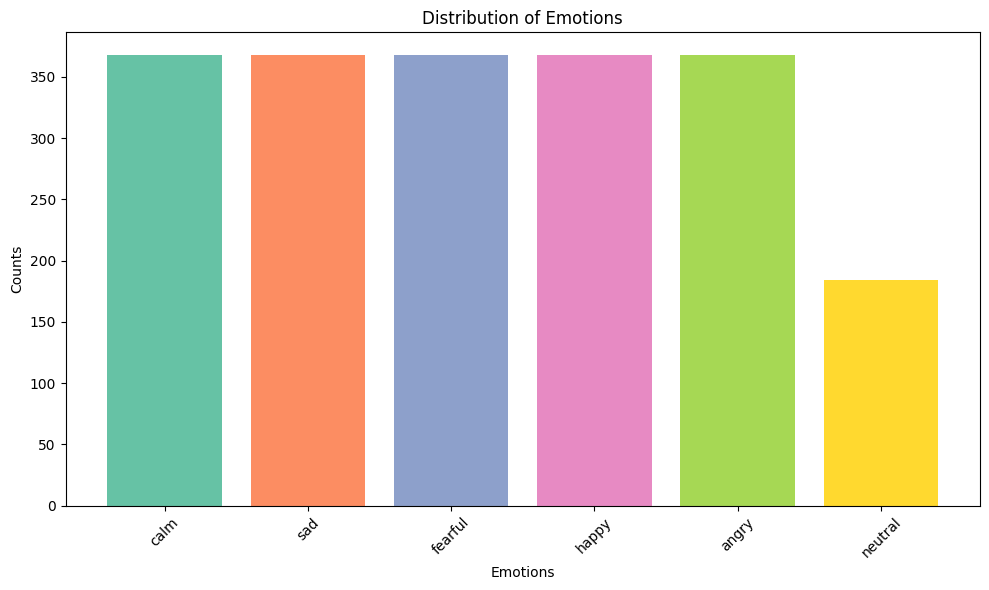

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Method 1: Using a color palette
emotion_counts = concate.Emotions.value_counts()

# Create figure and axis
plt.figure(figsize=(10, 6))

# Create bar plot with different colors using seaborn palette
colors = sns.color_palette("Set2", len(emotion_counts))  # You can try: "Set1", "Set2", "husl", "viridis", etc.
bars = plt.bar(emotion_counts.index, emotion_counts.values, color=colors)

# Add labels and title
plt.xlabel('Emotions')
plt.ylabel('Counts')
plt.title('Distribution of Emotions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Instead of using file_path[0], use concate['Path'].values[0]
file_path = concate['Path'].values[0]
label = concate['Emotions'].values[0]
# Then load
data, sr = librosa.load(file_path)
print(sr)
print(label)

22050
calm


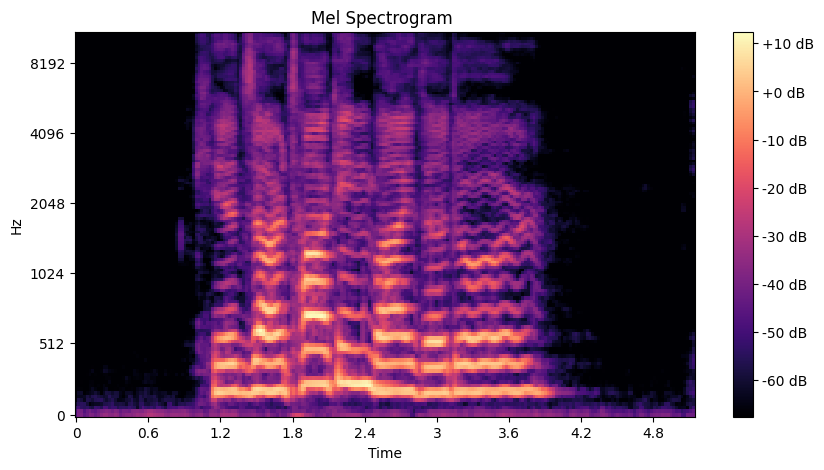

In [ ]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000)
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time');
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB')

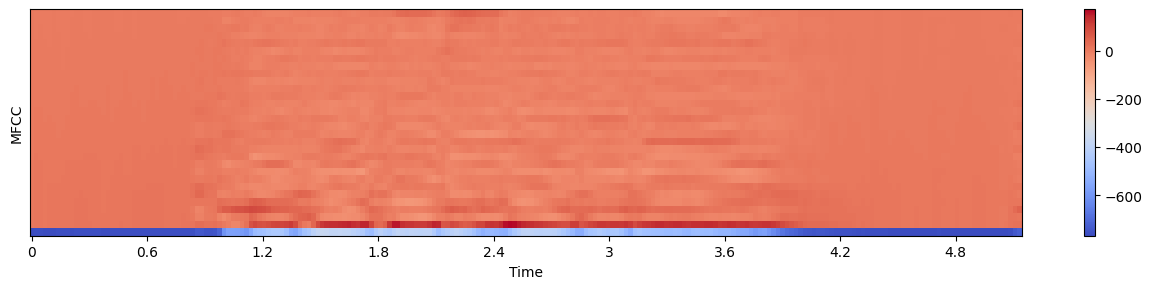

In [ ]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)

# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

In [ ]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# STRETCH
def stretch(data, rate=0.8):
    return librosa.resample(data, orig_sr=sr, target_sr=int(sr * rate))

# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor)

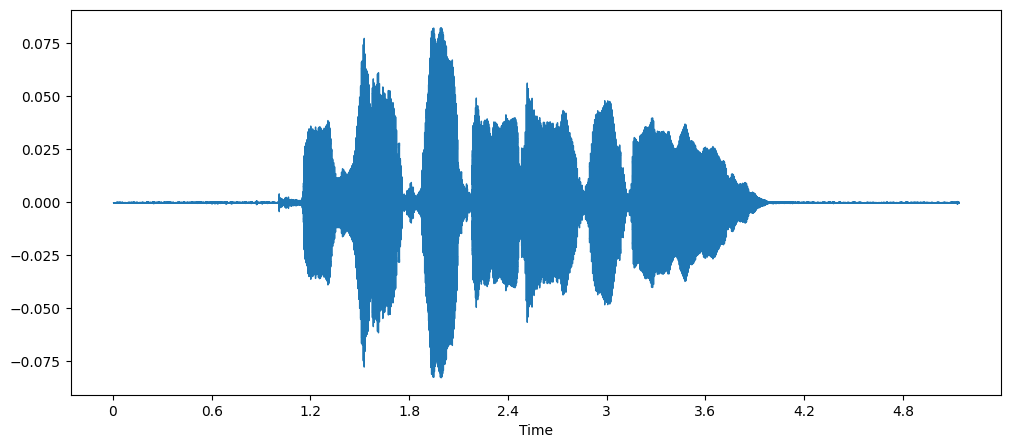

In [ ]:
# NORMAL AUDIO
import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
ipd.Audio(data,rate=sr)

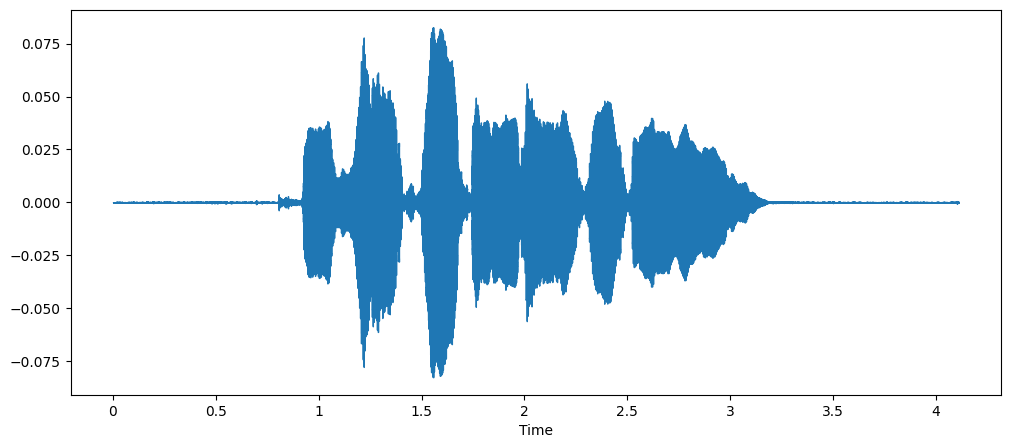

In [ ]:
# AUDIO WITH NOISE
x = stretch(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

In [ ]:
def zcr(data, frame_length, hop_length):
    zcr = librosa.feature.zero_crossing_rate(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)

def rmse(data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)

def mfcc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    mfcc = librosa.feature.mfcc(y=data, sr=sr)
    return np.squeeze(mfcc.T) if not flatten else np.ravel(mfcc.T)


def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])

    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result
def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data)
    audio=np.array(aud)

    noised_audio=noise(data)
    aud2=extract_features(noised_audio)
    audio=np.vstack((audio,aud2))

    pitched_audio=pitch(data,sr)
    aud3=extract_features(pitched_audio)
    audio=np.vstack((audio,aud3))

    pitched_audio1=pitch(data,sr)
    pitched_noised_audio=noise(pitched_audio1)
    aud4=extract_features(pitched_noised_audio)
    audio=np.vstack((audio,aud4))

    return audio

In [ ]:
from joblib import Parallel, delayed
import timeit
start = timeit.default_timer()
# Define a function to get features for a single audio file
def process_feature(path, emotion):
    features = get_features(path)
    X = []
    Y = []
    for ele in features:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)
    return X, Y

paths = concate.Path
emotions = concate.Emotions

# Run the loop in parallel
results = Parallel(n_jobs=-1)(delayed(process_feature)(path, emotion) for (path, emotion) in zip(paths, emotions))

# Collect the results
X = []
Y = []
for result in results:
    x, y = result
    X.extend(x)
    Y.extend(y)


stop = timeit.default_timer()

print('Time: ', stop - start)

Time:  263.5457930679986


In [ ]:
print(len(X))
len(Y)

9808


9808

In [ ]:
concate['Path'].shape

(2452,)

In [ ]:
features = pd.DataFrame(X)
features['Emotion'] = Y
features.to_csv('data preprocess/emotions_features.csv', index=False)
features.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotion
0,0.207031,0.321777,0.429199,0.422363,0.421387,0.401367,0.390625,0.379883,0.373047,0.362305,...,6.989310,6.622102,6.249315,5.875767,5.506067,5.144516,4.795065,4.461190,4.145898,fearful
1,0.209961,0.323730,0.427246,0.417480,0.419434,0.401367,0.407227,0.412109,0.399414,0.403809,...,7.978851,4.017052,-0.033362,2.341360,3.789515,5.772332,0.684476,-0.849550,0.514531,fearful
2,0.221680,0.336426,0.437988,0.439453,0.415527,0.409180,0.407715,0.397949,0.400879,0.376465,...,5.300551,5.259888,5.216083,5.169233,5.119439,5.066811,5.011452,4.953490,4.893044,fearful
3,0.236328,0.350098,0.463379,0.456543,0.440430,0.449707,0.454590,0.468750,0.479980,0.479492,...,2.652376,-3.990976,4.225117,6.910498,0.704288,-0.674261,2.430130,7.641247,1.836270,fearful
4,0.138672,0.214355,0.287598,0.297363,0.297852,0.314941,0.329102,0.346680,0.356445,0.346191,...,2.144511,2.129832,2.113950,2.096885,2.078657,2.059279,2.038794,2.017204,1.994543,angry


In [ ]:
emo_df = pd.read_csv('data preprocess/emotions_features.csv')
emo_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotion
0,0.207031,0.321777,0.429199,0.422363,0.421387,0.401367,0.390625,0.379883,0.373047,0.362305,...,6.989310,6.622102,6.249315,5.875767,5.506067,5.144516,4.795065,4.461190,4.145898,fearful
1,0.209961,0.323730,0.427246,0.417480,0.419434,0.401367,0.407227,0.412109,0.399414,0.403809,...,7.978851,4.017052,-0.033362,2.341360,3.789515,5.772332,0.684476,-0.849550,0.514531,fearful
2,0.221680,0.336426,0.437988,0.439453,0.415527,0.409180,0.407715,0.397949,0.400879,0.376465,...,5.300551,5.259888,5.216083,5.169233,5.119439,5.066811,5.011452,4.953490,4.893044,fearful
3,0.236328,0.350098,0.463379,0.456543,0.440430,0.449707,0.454590,0.468750,0.479980,0.479492,...,2.652376,-3.990976,4.225117,6.910498,0.704288,-0.674261,2.430130,7.641247,1.836270,fearful
4,0.138672,0.214355,0.287598,0.297363,0.297852,0.314941,0.329102,0.346680,0.356445,0.346191,...,2.144511,2.129832,2.113950,2.096885,2.078657,2.059279,2.038794,2.017204,1.994543,angry


In [ ]:
print(emo_df.isna().sum())

0           0
1           0
2           0
3           0
4           0
           ..
2372       60
2373       60
2374       60
2375       60
Emotion     0
Length: 2377, dtype: int64


In [ ]:
emo_df = emo_df.fillna(0)
emo_df.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
2372,0
2373,0
2374,0
2375,0


In [ ]:
X = emo_df.drop(columns = ['Emotion'])
Y = emo_df['Emotion']

In [ ]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,2366,2367,2368,2369,2370,2371,2372,2373,2374,2375
0,0.207031,0.321777,0.429199,0.422363,0.421387,0.401367,0.390625,0.379883,0.373047,0.362305,...,7.345999,6.989310,6.622102,6.249315,5.875767,5.506067,5.144516,4.795065,4.461190,4.145898
1,0.209961,0.323730,0.427246,0.417480,0.419434,0.401367,0.407227,0.412109,0.399414,0.403809,...,6.863364,7.978851,4.017052,-0.033362,2.341360,3.789515,5.772332,0.684476,-0.849550,0.514531
2,0.221680,0.336426,0.437988,0.439453,0.415527,0.409180,0.407715,0.397949,0.400879,0.376465,...,5.337986,5.300551,5.259888,5.216083,5.169233,5.119439,5.066811,5.011452,4.953490,4.893044
3,0.236328,0.350098,0.463379,0.456543,0.440430,0.449707,0.454590,0.468750,0.479980,0.479492,...,4.061079,2.652376,-3.990976,4.225117,6.910498,0.704288,-0.674261,2.430130,7.641247,1.836270
4,0.138672,0.214355,0.287598,0.297363,0.297852,0.314941,0.329102,0.346680,0.356445,0.346191,...,2.157970,2.144511,2.129832,2.113950,2.096885,2.078657,2.059279,2.038794,2.017204,1.994543


In [ ]:
Y.head()

,Emotion
0,fearful
1,fearful
2,fearful
3,fearful
4,angry


In [ ]:
# Encodeing label
from sklearn.preprocessing import OneHotEncoder
en = OneHotEncoder()
Y = en.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
Y.shape

(9808, 8)

In [ ]:
# splitting
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state = 42 , test_size = 0.2 , shuffle = True)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7846, 2376)
(7846, 8)
(1962, 2376)
(1962, 8)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train.shape

(7846, 2376)

In [ ]:
import keras
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

In [ ]:
# callbacks
#1. early stopping
early_stopping = EarlyStopping(monitor='val_accuracy',mode='max',patience=5,restore_best_weights=True)
#2. ReduceLROnPlateau
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.5,min_lr=0.00001)
#3. ModelCheckpoint
model_checkpoint = ModelCheckpoint('best_model1_weights.keras', monitor='val_accuracy', save_best_only=True)
# prepare data for conv1d
x_train_cnn = np.expand_dims(x_train, axis=2)
x_test_cnn = np.expand_dims(x_test, axis=2)

In [ ]:
import tensorflow.keras.layers as L

model = tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(x_train_cnn.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the second max pooling layer

    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fourth max pooling layer

    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fifth max pooling layer

    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(8,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 2376, 512)      │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 2376, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1188, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 1188, 512)      │     1,311,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1188, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 594, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 594, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 594, 256)       │       655,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 594, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 297, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 297, 256)       │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 297, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 149, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 149, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 149, 128)       │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 149, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 75, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 75, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,915,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         4,10

 Total params: 7,193,736 (27.44 MB)

 Trainable params: 7,189,384 (27.43 MB)

 Non-trainable params: 4,352 (17.00 KB)

In [ ]:
history=model.fit(x_train_cnn, y_train, epochs=20, validation_data=(x_test_cnn, y_test), batch_size=64,callbacks=[early_stopping,lr_reduction,model_checkpoint])

Epoch 1/40
 71/123 ━━━━━━━━━━━━━━━━━━━━ 18:22 21s/step - accuracy: 0.2906 - loss: 2.2890

KeyboardInterrupt: 

In [ ]:
model.save_weights("cnn_model.weights.h5")

print('model evaluation accuracy: ',model.evaluate(x_test_cnn , y_test))

In [ ]:
# inference on test data:
pred = model.predict(x_test_cnn)
y_pred = en.inverse_transform(pred)
y_true = en.inverse_transform(y_test)

df_results = pd.DataFrame({
    'True Label': y_true.flatten(),
    'Predicted Label': y_pred.flatten()
})

df_results.head(15)

In [ ]:
from sklearn.metrics import accuracy_score,f1_score
overall_accuracy = accuracy_score(y_true, y_pred)
print(f"\nOverall Test Accuracy: {overall_accuracy:.4f} ({overall_accuracy*100:.2f}%)")

# F1 Scores
f1_macro = f1_score(y_true, y_pred, average='macro')
f1_weighted = f1_score(y_true, y_pred, average='weighted')
f1_micro = f1_score(y_true, y_pred, average='micro')

print(f"\nF1 Scores:")
print(f"  Macro F1:    {f1_macro:.4f}")
print(f"  Weighted F1: {f1_weighted:.4f}")
print(f"  Micro F1:    {f1_micro:.4f}")

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true, y_pred)

class_names = [
    "neutral", "calm", "happy", "sad",
    "angry", "fearful", "disgust", "surprised"
]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix (Emotion Classification)")
plt.show()


per_class_acc = cm.diagonal() / cm.sum(axis=1)

for i, acc in enumerate(per_class_acc):
    print(f"Accuracy for class '{class_names[i]}': {acc*100:.2f}%")


In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['accuracy']) + 1)

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Loss
ax[0].plot(epochs, history.history['loss'], label='Training Loss')
ax[0].plot(epochs, history.history['val_loss'], label='Validation Loss')
ax[0].set_title('Training vs Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].grid(True)

# Accuracy
ax[1].plot(epochs, history.history['accuracy'], label='Training Accuracy')
ax[1].plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
ax[1].set_title('Training vs Validation Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
model.save("cnn_model_full.keras")

import joblib
joblib.dump(scaler, 'emotion_scaler.pkl') #save scaler
joblib.dump(en, 'emotion_encoder.pkl')    #save encoder

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("cnn_model_full.keras")
print('Done')

In [ ]:
import numpy as np
import librosa
import joblib
from tensorflow import keras

# Load all required components
MODEL = keras.models.load_model("cnn_model_full.keras")
SCALER = joblib.load('emotion_scaler.pkl')
ENCODER = joblib.load('emotion_encoder.pkl')

def zcr(data, frame_length, hop_length):
    zcr_feature = librosa.feature.zero_crossing_rate(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr_feature)

def rmse(data, frame_length=2048, hop_length=512):
    rmse_feature = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse_feature)

def mfcc(data, sr, frame_length=2048, hop_length=512, flatten=True):
    mfcc_feature = librosa.feature.mfcc(y=data, sr=sr, n_fft=frame_length, hop_length=hop_length)
    return np.squeeze(mfcc_feature.T) if not flatten else np.ravel(mfcc_feature.T)


def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])

    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_predict_feat(path):
    d, s_rate = librosa.load(path, duration=2.5, offset=0.6)
    res = extract_features(d)

    desired_length = 2376
    current_length = len(res)

    if current_length > desired_length:
        # Truncate
        res = res[:desired_length]
    elif current_length < desired_length:
        # Pad with zeros
        res = np.pad(res, (0, desired_length - current_length), 'constant')

    result = np.reshape(res, (1, desired_length))
    i_result = SCALER.transform(result)
    final_result = np.expand_dims(i_result, axis=2)

    return final_result


    return final_result

def prediction(path1):
    res=get_predict_feat(path1)
    predictions=MODEL.predict(res)
    y_pred = ENCODER.inverse_transform(predictions)
    print(y_pred[0][0])

In [ ]:
prediction("Audio_Song_Actors_01-24/Actor_11/03-02-02-01-01-02-11.wav")

In [ ]:
concate = pd.concat([speech_df,song_df], axis = 0)
concate.to_csv("data preprocess/data_path.csv",index=False)
concate.head()
concate.tail()

In [ ]:
import os

# Ensure directory exists
os.makedirs("data preprocess", exist_ok=True)

# Now save the file
concate.to_csv("data preprocess/data_path.csv", index=False)